In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [12]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# 假设你的CSV文件名为'data.csv'
# 并且目标变量的列名为'target'
df = pd.read_csv('train_dataset.csv')

# 分离特征和目标变量
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 使用RandomForestClassifier作为基模型
model = RandomForestClassifier()

# 使用RFE选择50个特征
selector = RFE(model, n_features_to_select=50, step=1)
selector = selector.fit(X, y)

# 获取选中的特征
selected_features = X.columns[selector.support_]

# 打印选中的特征
print("Selected features:")
print(selected_features)

# 创建一个包含选中特征的新数据框
X_selected = X[selected_features]

# 保存新数据框到新的CSV文件
X_selected['target'] = y
X_selected.to_csv('data-RFE.csv', index=False)

Selected features:
Index(['inorganic_formula_1_element_property_MagpieData avg_dev Number',
       'inorganic_formula_1_element_property_MagpieData mean MendeleevNumber',
       'inorganic_formula_1_element_property_MagpieData avg_dev AtomicWeight',
       'inorganic_formula_1_element_property_MagpieData mean MeltingT',
       'inorganic_formula_1_element_property_MagpieData avg_dev MeltingT',
       'inorganic_formula_1_element_property_MagpieData avg_dev Column',
       'inorganic_formula_1_element_property_MagpieData avg_dev Row',
       'inorganic_formula_1_element_property_MagpieData avg_dev CovalentRadius',
       'inorganic_formula_1_element_property_MagpieData mean Electronegativity',
       'inorganic_formula_1_element_property_MagpieData avg_dev Electronegativity',
       'inorganic_formula_1_element_property_MagpieData avg_dev NsValence',
       'inorganic_formula_1_element_property_MagpieData mean NpValence',
       'inorganic_formula_1_element_property_MagpieData mean NpUn

/tmp/ipykernel_190589/2677508082.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['target'] = y


In [23]:
# 预测集生成
import pandas as pd

# 加载保存的训练集RFE结果的CSV文件
df_rfe_results = pd.read_csv('data-RFE.csv')

# 获取选中的特征列表
selected_features = df_rfe_results.columns[:-1]  # 假设最后一列是目标变量，所以去掉最后一列

# 打印选中的特征
print("Selected features:")
print(selected_features)

# 加载预测集数据
df_predict = pd.read_csv('test_dataset.csv')

# 保留预测集中与训练集相同的选中特征
X_predict = df_predict[selected_features]

# 保存预测集的特征到新的CSV文件
X_predict.to_csv('test_dataset-RFE.csv', index=False)


Selected features:
Index(['inorganic_formula_1_element_property_MagpieData avg_dev Number',
       'inorganic_formula_1_element_property_MagpieData mean MendeleevNumber',
       'inorganic_formula_1_element_property_MagpieData avg_dev AtomicWeight',
       'inorganic_formula_1_element_property_MagpieData mean MeltingT',
       'inorganic_formula_1_element_property_MagpieData avg_dev MeltingT',
       'inorganic_formula_1_element_property_MagpieData avg_dev Column',
       'inorganic_formula_1_element_property_MagpieData avg_dev Row',
       'inorganic_formula_1_element_property_MagpieData avg_dev CovalentRadius',
       'inorganic_formula_1_element_property_MagpieData mean Electronegativity',
       'inorganic_formula_1_element_property_MagpieData avg_dev Electronegativity',
       'inorganic_formula_1_element_property_MagpieData avg_dev NsValence',
       'inorganic_formula_1_element_property_MagpieData mean NpValence',
       'inorganic_formula_1_element_property_MagpieData mean NpUn

In [13]:
# 读取数据
data = pd.read_csv('data-RFE.csv')


In [14]:
# 假设目标变量是最后一列，特征变量是其他列
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [15]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [16]:
# # 绘制目标值分布直方图
# plt.figure(figsize=(14, 8), dpi=100)
# plt.hist(y, bins=30, color='plum', edgecolor='black', alpha=0.7)
# plt.xlabel('Target Value', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.title('Distribution of Target Values', fontsize=16)
# plt.grid(True)
# plt.savefig('Target_Value_Distribution.png', dpi=300)
# plt.show()
# plt.close()

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# # 数据标准化
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# 定义参数网格
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'bootstrap': [True, False]
}

# 初始化模型
rf = RandomForestClassifier()

# 执行超参数调优
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", random_search.best_params_)
print("Best score: ", random_search.best_score_)

/home/customer/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "/home/customer/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/customer/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/customer/anaconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_par

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best score:  0.819047619047619


In [18]:
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split= 10)
rf_model.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=10)

F1 Score: 0.9289617486338798


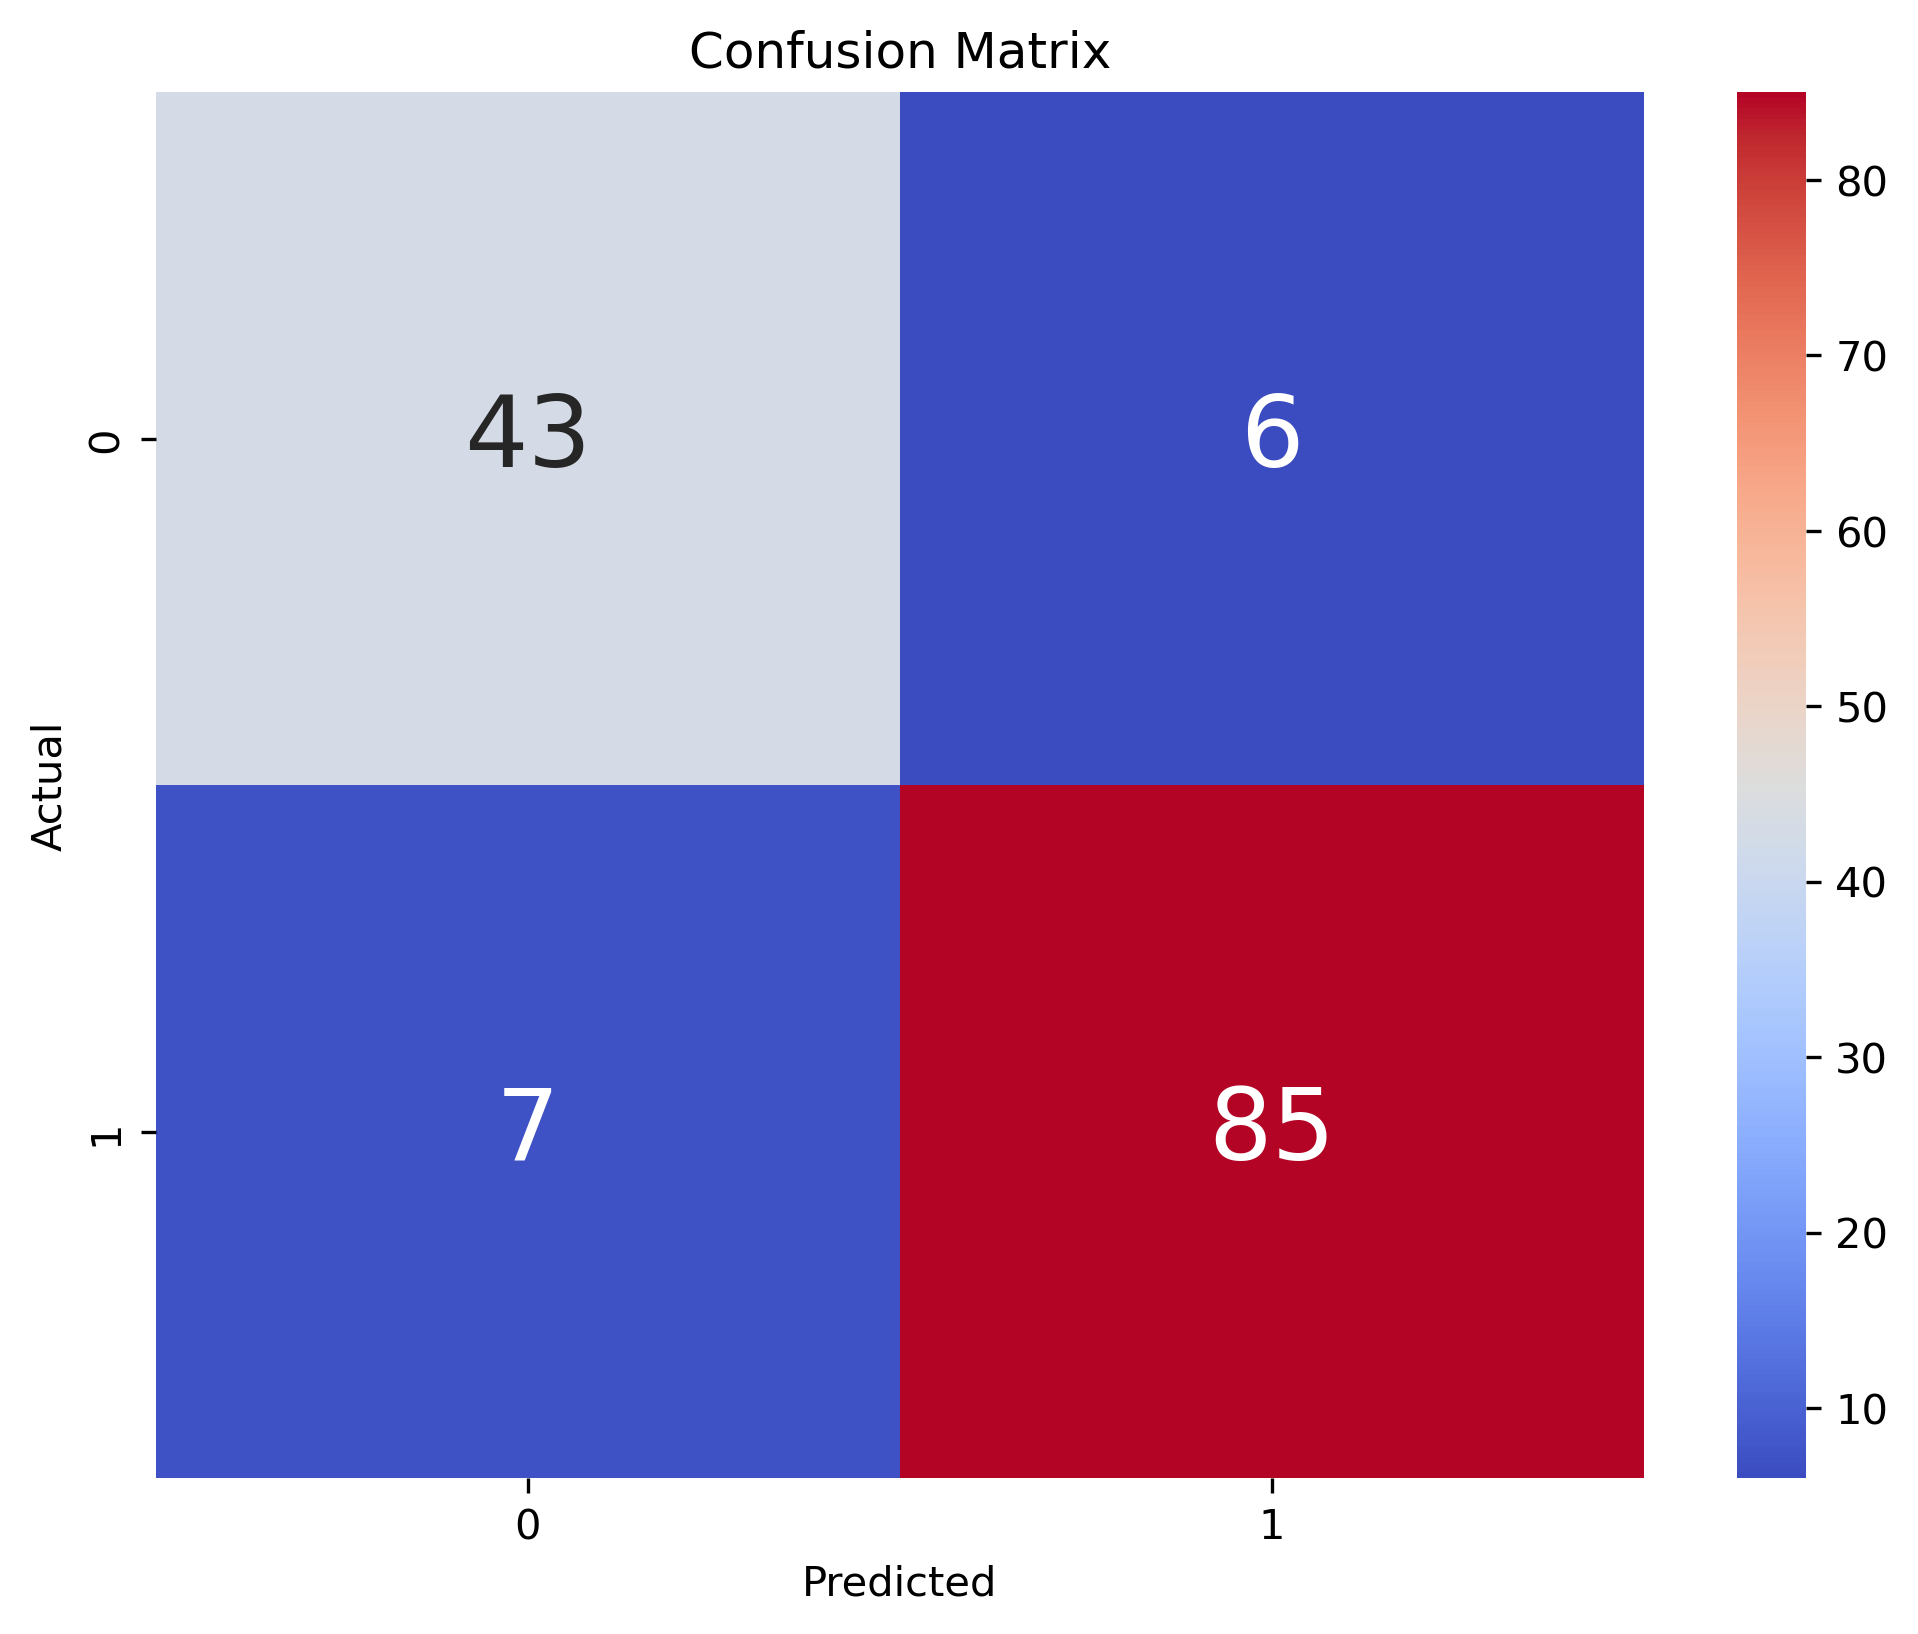

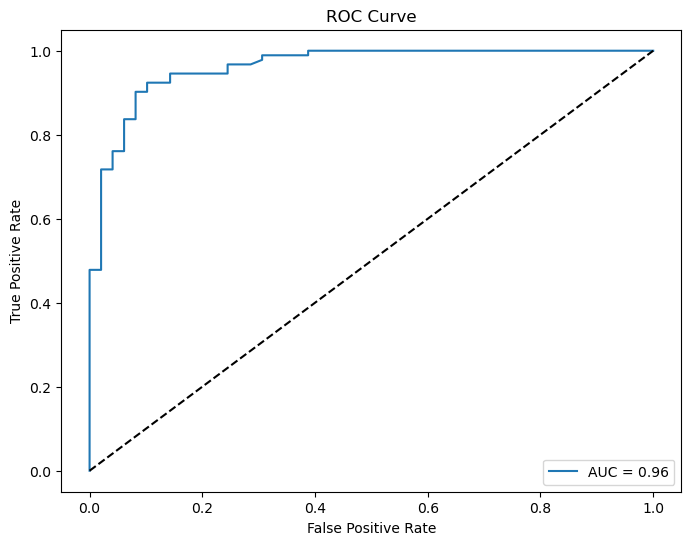

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.93      0.92      0.93        92

    accuracy                           0.91       141
   macro avg       0.90      0.90      0.90       141
weighted avg       0.91      0.91      0.91       141

Accuracy: 0.91


In [19]:
y_pred = rf_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


F1 Score: 0.9761904761904762


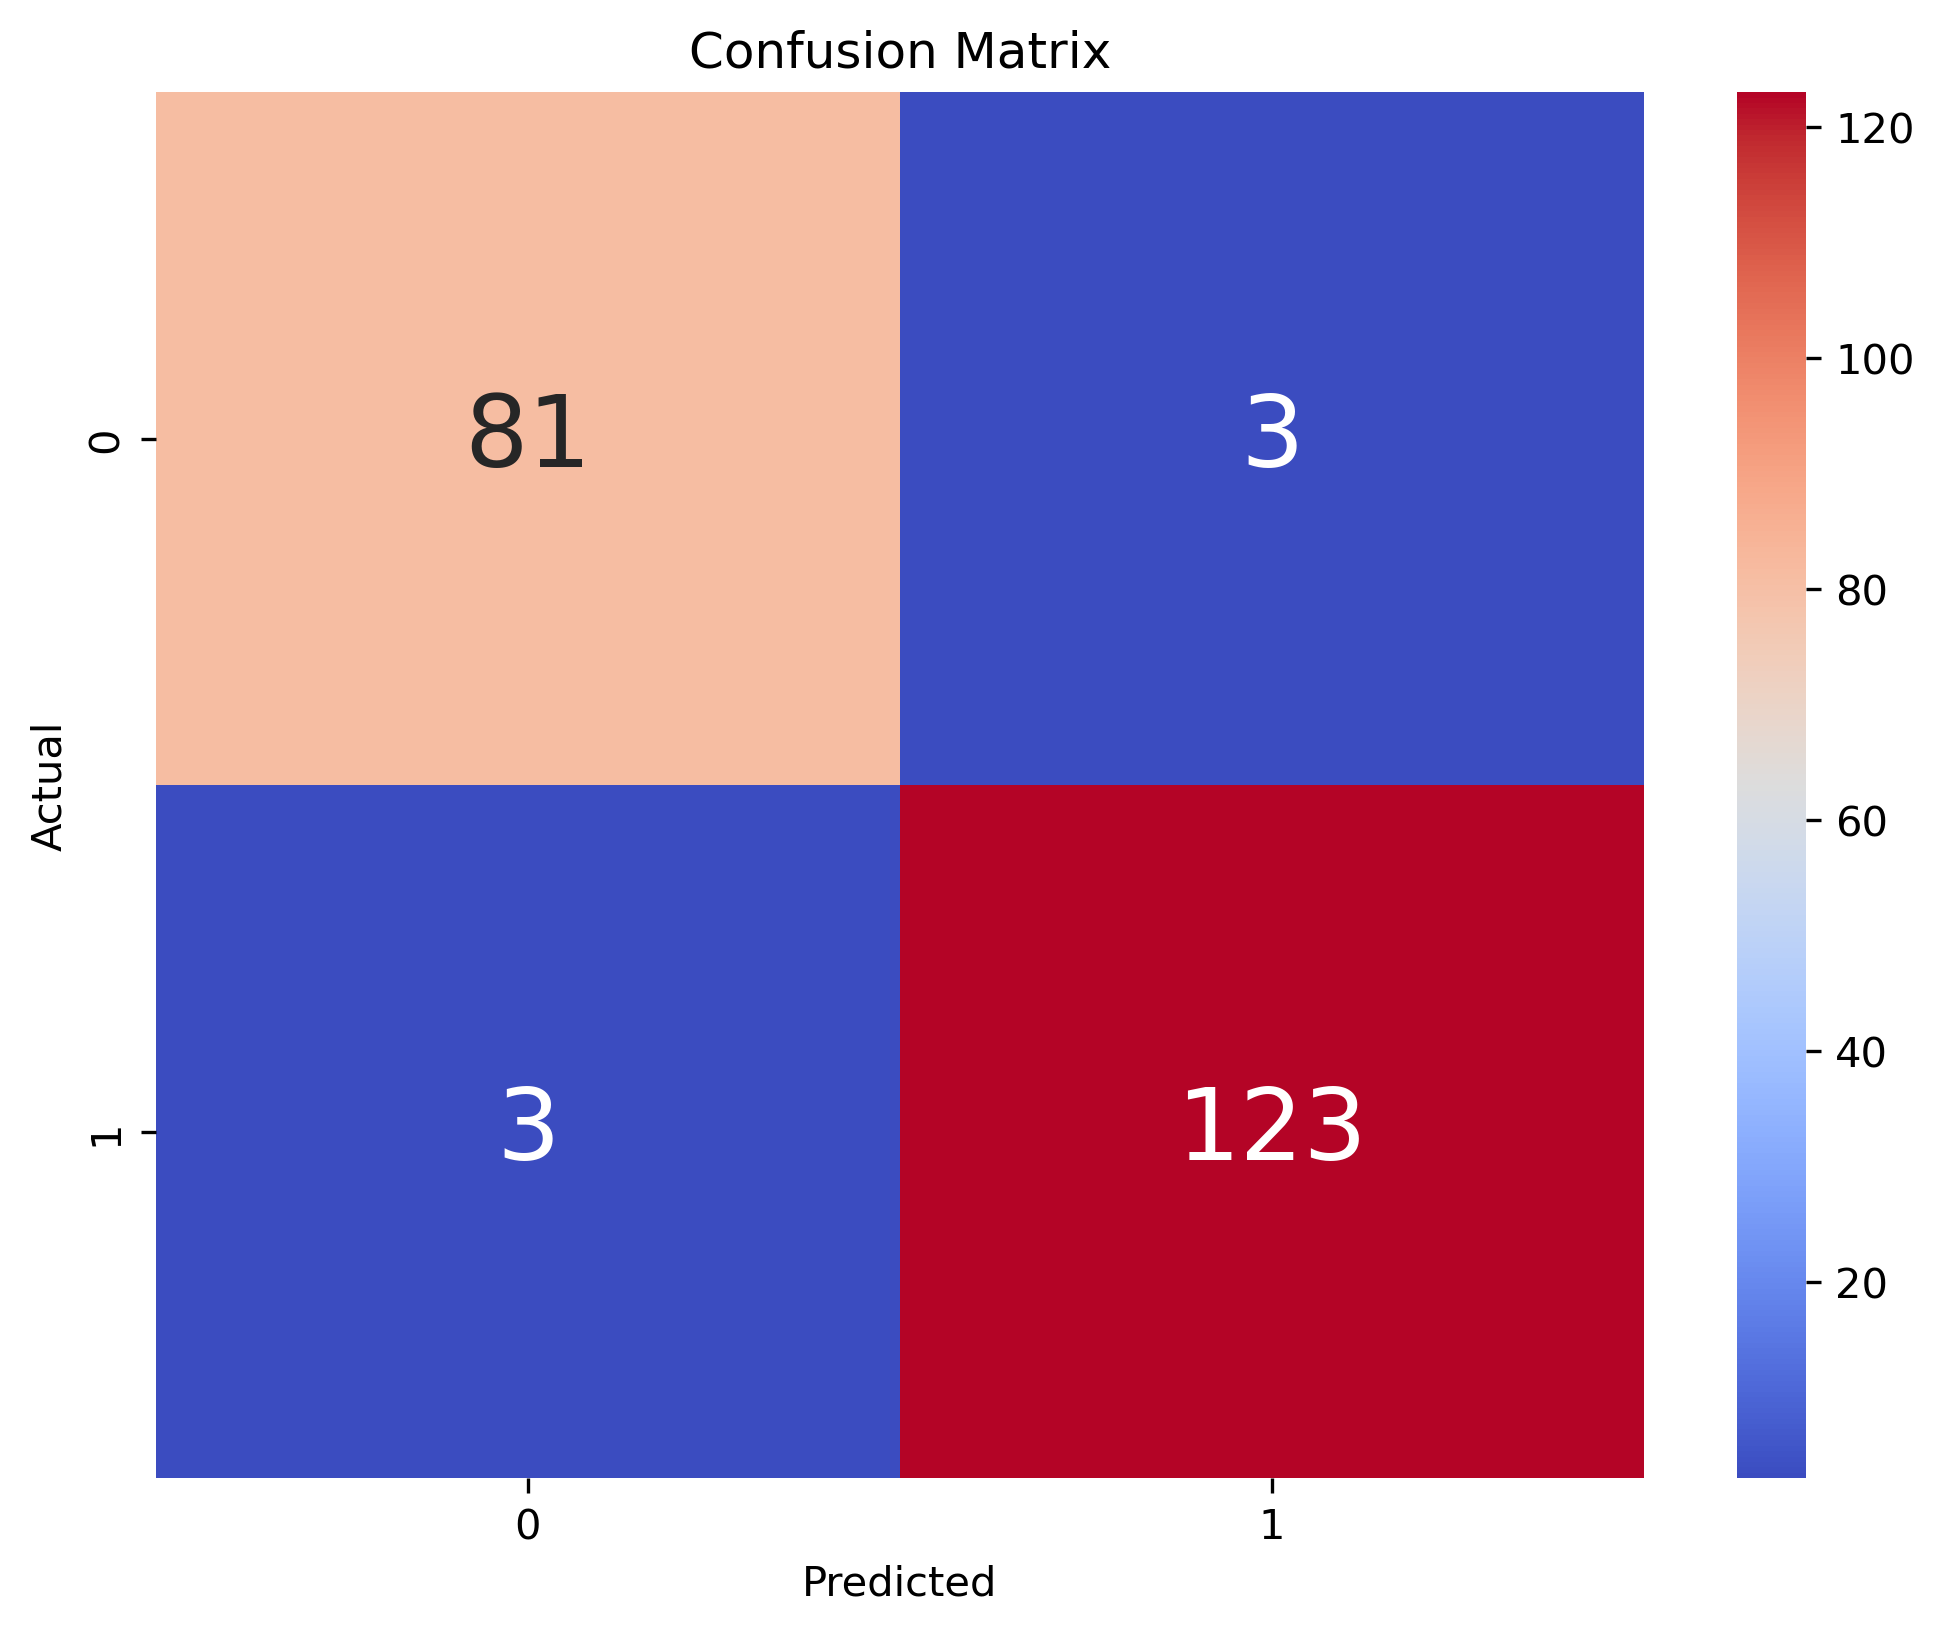

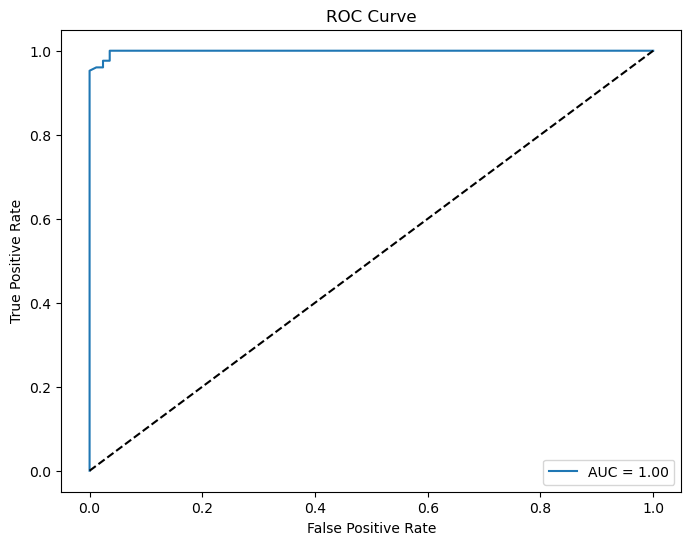

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        84
           1       0.98      0.98      0.98       126

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

Accuracy: 0.97


In [20]:
y_pred = rf_model.predict(X_train)
f1 = f1_score(y_train, y_pred)
print(f"F1 Score: {f1}")
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_train, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_train, y_pred))
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [21]:
joblib.dump(rf_model, 'RF.pkl')


['RF.pkl']

In [25]:
import pandas as pd

# 假设 new_X_test 是一个 pandas DataFrame 或 numpy 数组，包含需要预测的样本
new_X_test = pd.read_csv('test_dataset-RFE.csv')

# 对新数据进行预测
new_data_predictions = rf_model.predict(new_X_test)

# 获取每个样本属于每个类别的概率（可选）
new_data_probabilities = rf_model.predict_proba(new_X_test)

# 创建结果 DataFrame，并添加 uuid 列
results = pd.DataFrame({
    'uuid': range(1, len(new_data_predictions) + 1),
    'Label': new_data_predictions,
    # 'Probability_Class_0': new_data_probabilities[:, 0],
    # 'Probability_Class_1': new_data_probabilities[:, 1]
})

# 保存预测结果到文件
results.to_csv('test_dataset-RFE-prediction.csv', index=False)

# 打印结果
print(results)


     uuid  Label
0       1      0
1       2      0
2       3      0
3       4      0
4       5      0
..    ...    ...
348   349      1
349   350      1
350   351      1
351   352      1
352   353      1

[353 rows x 2 columns]
